In [3]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf # type: ignore
import pandas_datareader as pdr # type: ignore

#Data viz
import plotly.graph_objs as go # type: ignore
import plotly.express as px # type: ignore

import time
from datetime import date

In [5]:
import matplotlib.pyplot as plt # type: ignore

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Question 1
### What is the average growth (in %) of GDP in 2023?

In [38]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start_date = date(year=2000, month=1, day=1)
print(f'Period for indexes: {start_date} to {end} ')

Year = 2024; month= 4; day=22
Period for indexes: 2000-01-01 to 2024-04-22 


In [39]:
gdp_2023 = pdr.DataReader('GDPC1', 'fred', start_date)

In [40]:
gdp_2023

,GDPC1
DATE,
2000-01-01,13878.147
2000-04-01,14130.908
2000-07-01,14145.312
2000-10-01,14229.765
2001-01-01,14183.120
...,...
2022-10-01,21989.981
2023-01-01,22112.329
2023-04-01,22225.350


In [41]:
gdp_2023['YoY'] = gdp_2023.GDPC1/gdp_2023.GDPC1.shift(4)-1

In [42]:
gdp_2023.tail()[1:]['YoY'].mean().round(4) * 100

2.54

## Question 2
- Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.

In [43]:
dgs10 = pdr.DataReader("DGS10", "fred", start=start_date)
dgs10.tail()

,DGS10
DATE,
2024-04-12,4.50
2024-04-15,4.63
2024-04-16,4.67
2024-04-17,4.59
2024-04-18,4.64


In [44]:
dgs2 = pdr.DataReader('DGS2', 'fred', start=start_date)
dgs2.tail()

,DGS2
DATE,
2024-04-12,4.88
2024-04-15,4.93
2024-04-16,4.97
2024-04-17,4.93
2024-04-18,4.98


In [47]:
dgs10_2 = dgs10.join(dgs2)

In [48]:
dgs10_2['diff'] = dgs10_2.DGS10 - dgs10_2.DGS2

In [49]:
dgs10_2

,DGS10,DGS2,diff
DATE,,,
2000-01-03,6.58,6.38,0.20
2000-01-04,6.49,6.30,0.19
2000-01-05,6.62,6.38,0.24
2000-01-06,6.57,6.35,0.22
2000-01-07,6.52,6.31,0.21
...,...,...,...
2024-04-12,4.50,4.88,-0.38
2024-04-15,4.63,4.93,-0.30
2024-04-16,4.67,4.97,-0.30


In [55]:
dgs10_2['diff'].min().round(1)

-1.1

## Question 3
- Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)

#### S&P 500

In [125]:
snp500 = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [126]:
snp500.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-15,5149.669922,5168.430176,5052.470215,5061.819824,5061.819824,3950210000
2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,5051.410156,4006200000
2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000


In [127]:
# 252 trading days a year
snp500['snp500_dod'] = (snp500.Close/snp500.Close.shift(1)-1)
snp500['snp500_qoq'] = (snp500.Close/snp500.Close.shift(63)-1)
snp500['snp500_yoy'] = (snp500.Close/snp500.Close.shift(252)-1)

snp500['adj_close_last_year'] = snp500['Adj Close'].shift(252)
snp500['yoy_growth'] = snp500['Adj Close'] / snp500['adj_close_last_year'] -1

In [128]:
snp500.tail()

,Open,High,Low,Close,Adj Close,Volume,snp500_dod,snp500_qoq,snp500_yoy,adj_close_last_year,yoy_growth
Date,,,,,,,,,,,
2024-04-15,5149.669922,5168.430176,5052.470215,5061.819824,5061.819824,3950210000,-0.012021,0.058110,0.220828,4146.220215,0.220828
2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,5051.410156,4006200000,-0.002057,0.059889,0.220843,4137.640137,0.220843
2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000,-0.005781,0.059715,0.209786,4151.319824,0.209786
2024-04-18,5031.520020,5056.660156,5001.890137,5011.120117,5011.120117,3619760000,-0.002208,0.048145,0.206083,4154.870117,0.206083
2024-04-19,5005.439941,5019.020020,4953.560059,4967.229980,4967.229980,3878750000,-0.008759,0.026327,0.195621,4154.520020,0.195621


#### IPC MEX

In [129]:
ipc_mex = yf.download(tickers = "^MXX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [130]:
# 252 trading days a year
ipc_mex['ipc_dod'] = (ipc_mex.Close/ipc_mex.Close.shift(1)-1)
ipc_mex['ipc_qoq'] = (ipc_mex.Close/ipc_mex.Close.shift(63)-1)
ipc_mex['ipc_yoy'] = (ipc_mex.Close/ipc_mex.Close.shift(252)-1)

ipc_mex['adj_close_last_year'] = ipc_mex['Adj Close'].shift(252)
ipc_mex['yoy_growth'] = ipc_mex['Adj Close'] / ipc_mex['adj_close_last_year'] -1

In [131]:
ipc_mex.tail()

,Open,High,Low,Close,Adj Close,Volume,ipc_dod,ipc_qoq,ipc_yoy,adj_close_last_year,yoy_growth
Date,,,,,,,,,,,
2024-04-16,56009.730469,56148.000000,55626.750000,55797.250000,55797.250000,225862900,-0.003336,0.003420,0.024554,54460.058594,0.024554
2024-04-17,55788.738281,56090.320312,55383.250000,55415.691406,55415.691406,244258900,-0.006838,-0.001539,0.011624,54778.929688,0.011624
2024-04-18,55597.789062,55941.621094,55585.820312,55739.429688,55739.429688,208671900,0.005842,0.011154,0.024895,54385.519531,0.024895
2024-04-19,55811.191406,56036.718750,55579.691406,55862.851562,55862.851562,138617600,0.002214,0.021040,0.028629,54308.089844,0.028629
2024-04-22,55852.281250,56145.070312,55771.550781,56069.648438,56069.648438,30770373,0.003702,0.024891,0.032710,54293.710938,0.032710


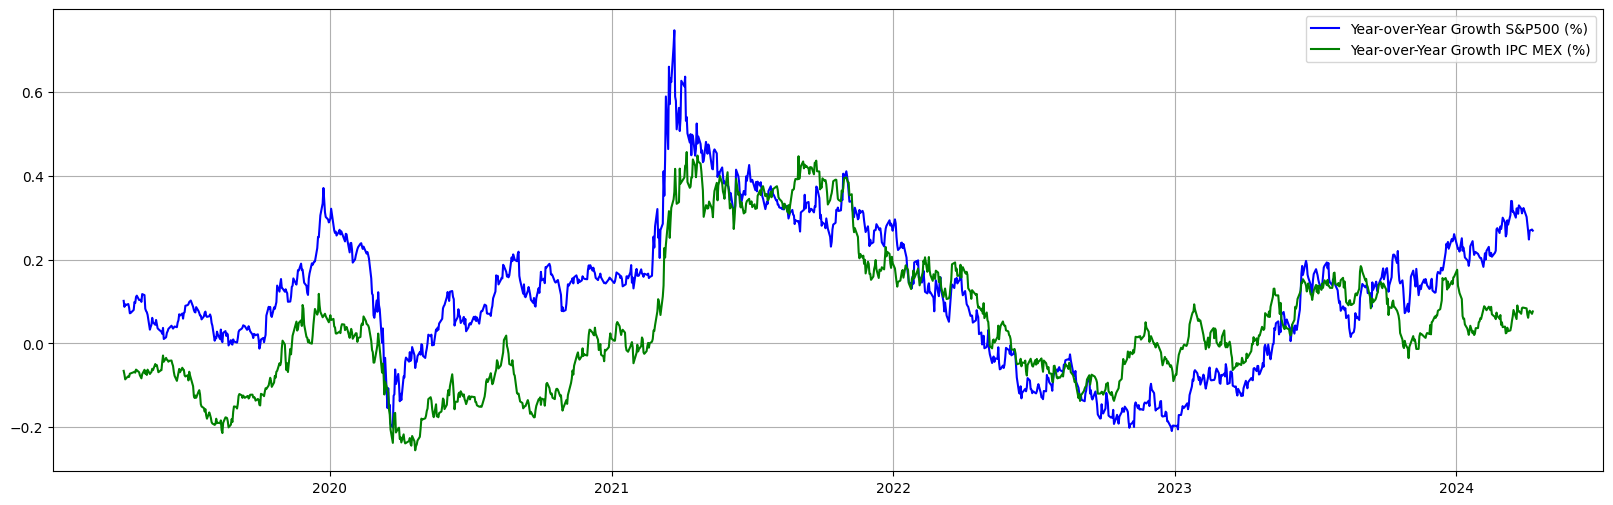

In [132]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

ax.plot(snp500['2019-04-09' : '2024-04-09'].snp500_yoy,
         color="blue",
        #  marker=".",
         label="Year-over-Year Growth S&P500 (%)")

ax.plot(ipc_mex['2019-04-09' : '2024-04-09'].ipc_yoy,
         color="green",
        #  marker=".",
         label="Year-over-Year Growth IPC MEX (%)")

plt.legend()

plt.show()

In [133]:
snp500['2019-04-09' : '2024-04-09'].yoy_growth.max().round(3) * 100

74.8

In [134]:
ipc_mex['2019-04-09' : '2024-04-09'].yoy_growth.max().round(3) * 100

45.7

## Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks
- Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023

- > 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM

In [137]:
sr_2222 = yf.download(tickers = "2222.SR",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [138]:
sr_2222.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-16,30.400000,30.450001,29.799999,29.900000,29.900000,24539116
2024-04-17,30.049999,30.150000,29.900000,29.950001,29.950001,16440263
2024-04-18,30.000000,30.049999,29.850000,29.900000,29.900000,7985988
2024-04-21,30.000000,30.200001,29.900000,30.049999,30.049999,8988623
2024-04-22,30.100000,30.299999,30.000000,30.150000,30.150000,12033500


In [140]:
brk_b = yf.download(tickers = "BRK-B",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [141]:
brk_b.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-16,400.970001,401.250000,396.500000,396.920013,396.920013,3435500
2024-04-17,398.940002,399.279999,395.660004,397.739990,397.739990,2465600
2024-04-18,399.700012,402.989990,399.100006,399.890015,399.890015,2669500
2024-04-19,401.040009,405.570007,400.170013,405.079987,405.079987,3996100
2024-04-22,406.839996,411.260101,406.250000,410.550995,410.550995,1328758


In [142]:
aapl = yf.download(tickers = "AAPL",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [143]:
aapl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-16,171.750000,173.759995,168.270004,169.380005,169.380005,73711200
2024-04-17,169.610001,170.649994,168.000000,168.000000,168.000000,50901200
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900
2024-04-19,166.210007,166.399994,164.080002,165.000000,165.000000,67772100
2024-04-22,165.750000,167.259995,164.770004,167.175003,167.175003,25302516


In [144]:
msft = yf.download(tickers = "MSFT",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [145]:
msft.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-16,414.570007,418.399994,413.730011,414.579987,414.579987,16765600
2024-04-17,417.250000,418.880005,410.329987,411.839996,411.839996,15855500
2024-04-18,410.630005,411.890015,403.950012,404.269989,404.269989,21029900
2024-04-19,404.029999,405.480011,397.769989,399.119995,399.119995,30276500
2024-04-22,400.187988,402.500000,395.750000,400.799988,400.799988,9966721


In [146]:
goog = yf.download(tickers = "GOOG",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [147]:
goog.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-16,155.639999,157.229996,155.050003,156.000000,156.000000,15413200
2024-04-17,157.190002,158.681000,156.134995,156.880005,156.880005,16237800
2024-04-18,156.925003,158.485001,156.210007,157.460007,157.460007,14016100
2024-04-19,157.750000,157.990005,153.910004,155.720001,155.720001,20063900
2024-04-22,156.009995,158.759995,155.660004,158.630402,158.630402,9181294


In [148]:
jpm = yf.download(tickers = "JPM",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [149]:
jpm.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-16,182.899994,183.160004,179.649994,180.800003,180.800003,16451800
2024-04-17,181.369995,182.419998,179.199997,180.080002,180.080002,9017100
2024-04-18,181.100006,183.360001,179.970001,181.250000,181.250000,9557700
2024-04-19,182.399994,185.880005,181.410004,185.800003,185.800003,13380200
2024-04-22,185.990005,189.669998,186.184998,189.580002,189.580002,5075747


In [166]:
def q4(df):
    df = df['2023-01-01': '2024-01-01']
    return (df['Adj Close'].max() - df['Adj Close'].min()) / df['Adj Close'].max()

In [168]:
q4(sr_2222).round(2), q4(brk_b).round(2), q4(aapl).round(2), q4(msft).round(2), q4(goog).round(2),q4(jpm).round(2)

(0.21, 0.21, 0.37, 0.42, 0.39, 0.28)

## Question 5. [Stocks] Dividend Yield
- Find the largest dividend yield for the same set of stocks

In [170]:
# get actions, incl. dividends - as a dataFrame
sr_2222_div = yf.Ticker('2222.SR')
sr_2222_div.get_actions()

brk_b_div = yf.Ticker('BRK-B')
brk_b_div.get_actions()

aapl_div = yf.Ticker('AAPL')
aapl_div.get_actions()

msft_div = yf.Ticker('MSFT')
msft_div.get_actions()

goog_div = yf.Ticker('GOOG')
goog_div.get_actions()

jpm_div = yf.Ticker('JPM')
jpm_div.get_actions()

,Dividends,Stock Splits
Date,,
1982-04-16 00:00:00-05:00,0.000000,1.5
1984-03-09 00:00:00-05:00,0.196667,0.0
1984-04-16 00:00:00-05:00,0.000000,1.5
1984-06-11 00:00:00-04:00,0.196667,0.0
1984-09-10 00:00:00-04:00,0.196667,0.0
...,...,...
2023-04-05 00:00:00-04:00,1.000000,0.0
2023-07-05 00:00:00-04:00,1.000000,0.0
2023-10-05 00:00:00-04:00,1.050000,0.0


In [200]:
def q5(ticker):
    # Get Dividennds
    div = yf.Ticker(ticker)
    div_df = div.get_actions()
    div_df = div_df['2023-01-01': '2024-01-01']
    # Sum of all dividens
    total_div = div_df.Dividends.sum()

    # Adjust Close for the same stock
    df = yf.download(tickers = ticker,
                     period = "max",
                     interval = "1d")
    adj_close = df['2023-01-01': '2024-01-01']['Adj Close'].iloc[[-1]].values[0]

    print(f'For Stock {ticker}')
    print(f'Total amount of dividends payed {total_div}')
    print(f'Last Adj Close is {adj_close}')
    print(f'The dividend yield is {total_div / adj_close * 100:,.2f}')

In [201]:
q5('JPM')

[*********************100%%**********************]  1 of 1 completed

For Stock JPM
Total amount of dividends payed 4.05
Last Adj Close is 168.07713317871094
The dividend yield is 2.41


In [202]:
q5('GOOG')

[*********************100%%**********************]  1 of 1 completed

For Stock GOOG
Total amount of dividends payed 0.0
Last Adj Close is 140.92999267578125
The dividend yield is 0.00


In [203]:
q5('MSFT')

[*********************100%%**********************]  1 of 1 completed

For Stock MSFT
Total amount of dividends payed 2.79
Last Adj Close is 375.34588623046875
The dividend yield is 0.74


In [204]:
q5('AAPL')

[*********************100%%**********************]  1 of 1 completed

For Stock AAPL
Total amount of dividends payed 0.95
Last Adj Close is 192.28463745117188
The dividend yield is 0.49


In [205]:
q5('BRK-B')

[*********************100%%**********************]  1 of 1 completed

For Stock BRK-B
Total amount of dividends payed 0.0
Last Adj Close is 356.6600036621094
The dividend yield is 0.00


In [206]:
q5('2222.SR')

[*********************100%%**********************]  1 of 1 completed

For Stock 2222.SR
Total amount of dividends payed 0.9107640000000001
Last Adj Close is 32.87778854370117
The dividend yield is 2.77


## Question 6

In [207]:
mchp = yf.download(tickers = "MCHP",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [208]:
mchp.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-16,86.139999,86.879997,85.459999,85.930000,85.930000,3449000
2024-04-17,86.389999,87.029999,84.699997,85.070000,85.070000,4820400
2024-04-18,84.660004,85.919998,83.779999,84.209999,84.209999,5261200
2024-04-19,83.889999,84.209999,80.900002,81.680000,81.680000,6910400
2024-04-22,82.320000,84.330002,81.680000,84.269997,84.269997,1410744


- Microchip Inc. is a Company I used to work for and because I know a little about the company and have some shares I would like to know more about it

# Question 7

To develop an analytical strategy for selecting a subset of companies based on future events data, particularly focusing on earnings release dates and other significant events, you can follow a multifaceted approach that combines quantitative analysis, event anticipation, and sector-specific trends. Here’s how to set up and execute this strategy:

### Step 1: Define the Universe and Gather Data
- **Universe Definition**: Define the universe of companies you want to analyze (e.g., S&P 500, tech startups, etc.).
- **Data Collection**: Gather data on future events such as earnings dates, product launches, and regulatory decisions from platforms like Yahoo Finance, company websites, and industry news sources.

### Step 2: Quantitative Screening
- **Historical Performance Metrics**: Use financial ratios like P/E, P/B, ROE, and historical growth metrics to perform initial screening of companies.
- **Volatility and Liquidity Filters**: Include filters for price volatility and trading volume to ensure the selected companies meet your risk and liquidity criteria.

### Step 3: Event-Driven Analysis
- **Earnings Momentum**: Analyze historical earnings surprises and trends. Companies with a track record of beating earnings estimates may carry positive momentum into future earnings.
- **Event Anticipation**: Incorporate anticipated events such as product launches or regulatory approvals that could significantly impact the company’s future revenue and market positioning.

### Step 4: Sentiment Analysis
- **News and Social Media Sentiment**: Leverage natural language processing (NLP) techniques to gauge sentiment from financial news and social media. High positive sentiment can indicate bullish outlooks before significant events.
- **Analyst Ratings and Forecasts**: Include analyst upgrades, downgrades, and target price changes as these can influence stock performance leading up to and after events.

### Step 5: Sector and Macro Analysis
- **Sector Trends**: Identify sectors with positive momentum or those expected to benefit from current economic conditions. For instance, technology during digital transformation trends or healthcare during medical breakthroughs.
- **Macro-Economic Indicators**: Consider the impact of broader economic indicators like interest rates, inflation, and employment data on your selected universe.

### Step 6: Risk Assessment and Management
- **Risk Profiling**: Assess the risk associated with each event, considering factors like market conditions and company-specific issues (e.g., high debt levels).
- **Diversification**: Ensure your selection is diversified across different sectors and event types to mitigate risk.

### Step 7: Backtesting and Validation
- **Historical Backtesting**: Backtest your strategy using historical data to see how it would have performed during past events. Adjust your strategy based on the backtesting results.
- **Continuous Validation**: Regularly review and validate the strategy against new data and adjust as market conditions change.

### Step 8: Implementation
- **Trading System Integration**: Implement the strategy in a trading system where you can continuously monitor selected companies and execute trades based on predefined rules related to events.
- **Real-time Monitoring**: Set up alerts for news, stock price thresholds, and other indicators that would trigger a review or a transaction.

This analytical strategy is designed to be dynamic, allowing for adjustments as new data comes in and market conditions evolve. It uses a combination of historical data analysis, anticipation of future events, sentiment analysis, and risk management to select a robust subset of companies for investment or further research.